In [1]:
#Bộ dữ liệu đang được sử dụng cho Dự báo lưu lượng truy cập trang web.
#được thu thập từ dữ liệu lưu lượng truy cập hàng ngày của thecleverprogrammer.com. 
#Nó chứa dữ liệu về dữ liệu lưu lượng truy cập hàng ngày từ tháng 6 năm 2021 đến tháng 6 năm 2022.

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [2]:
#Tập dữ liệu chứa hai cột, ngày và lưu lượng truy cập. 
#Chuyển đổi cột Ngày thành kiểu dữ liệu Ngày giờ.
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


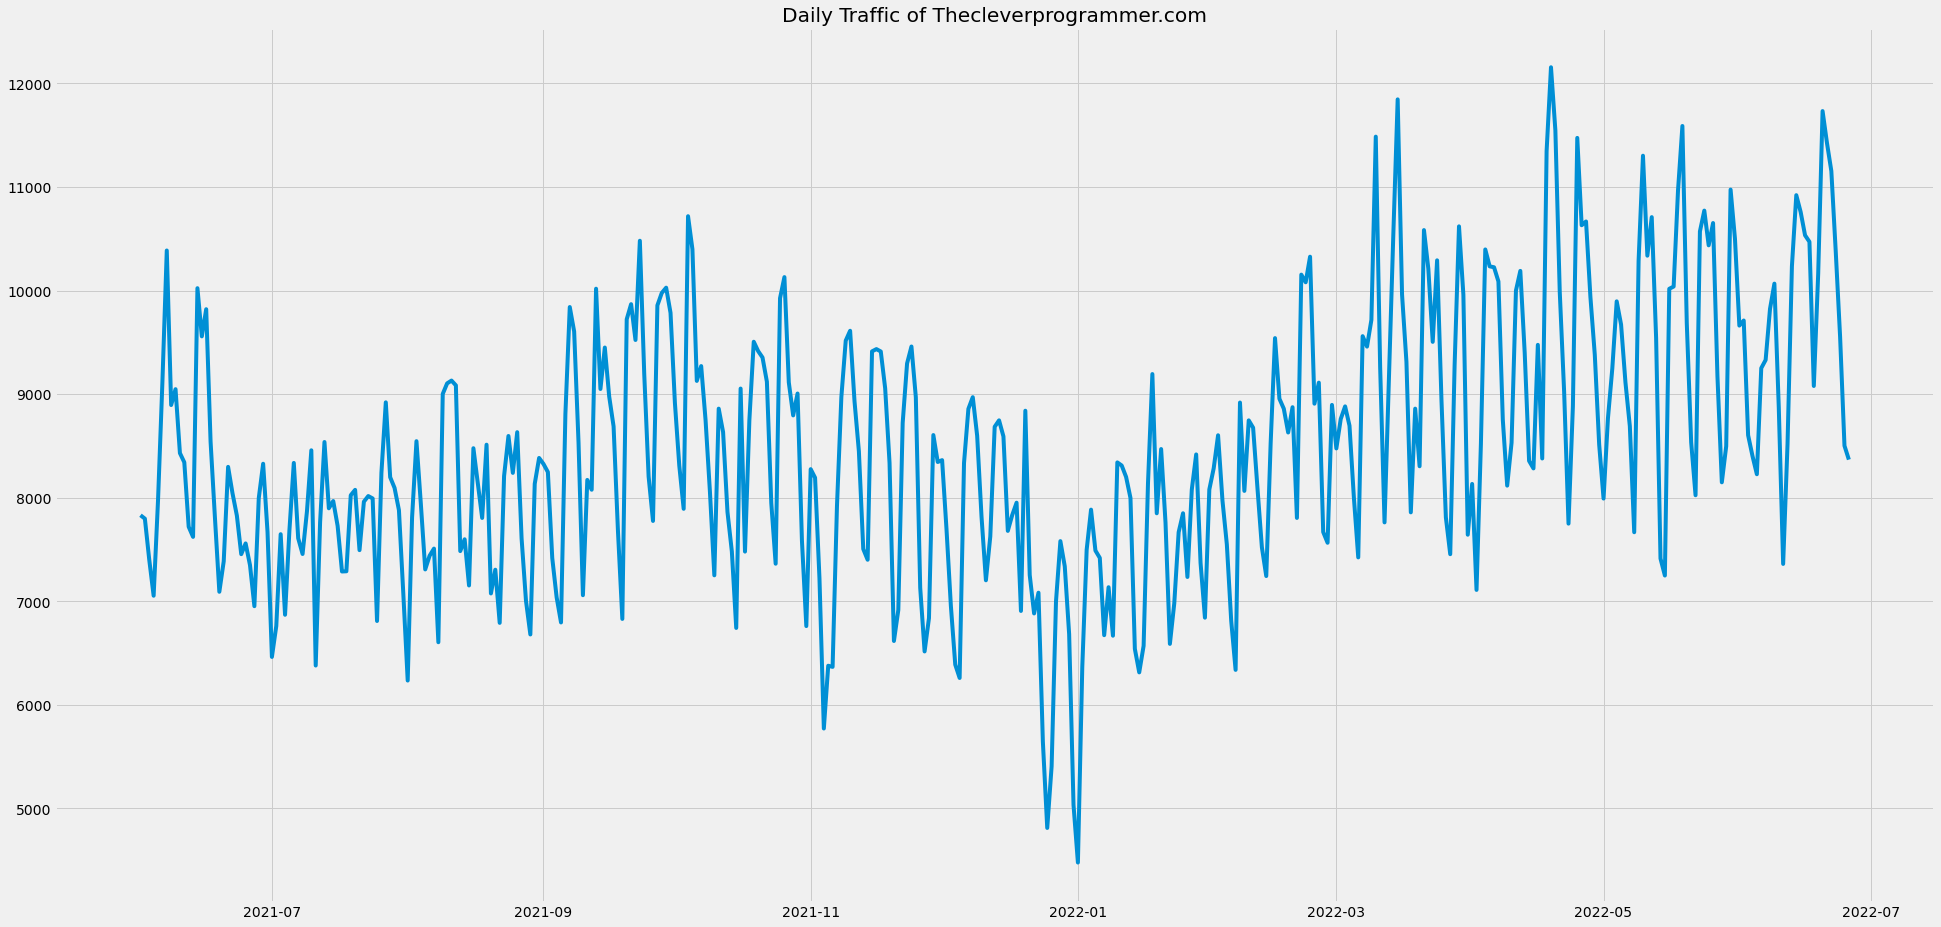

In [25]:
#Cột Ngày giờ ban đầu là một đối tượng, vì vậy đã chuyển đổi nó thành cột Ngày giờ.
#Xuất ra lưu lượng truy cập hàng ngày của trang web:

plt.style.use('fivethirtyeight')

#Kích thước biểu đồ
plt.figure(figsize=(30, 15))

plt.plot(data["Date"], data["Views"]) ##Cột dọc là số lượng truy cập, cột ngang là khoảng thời gian từ 06/2021 đến 06/2022

#Tiêu đề
plt.title("Daily Traffic of Thecleverprogrammer.com")

#Xuất ra biểu đồ
plt.show()

<Figure size 432x288 with 0 Axes>

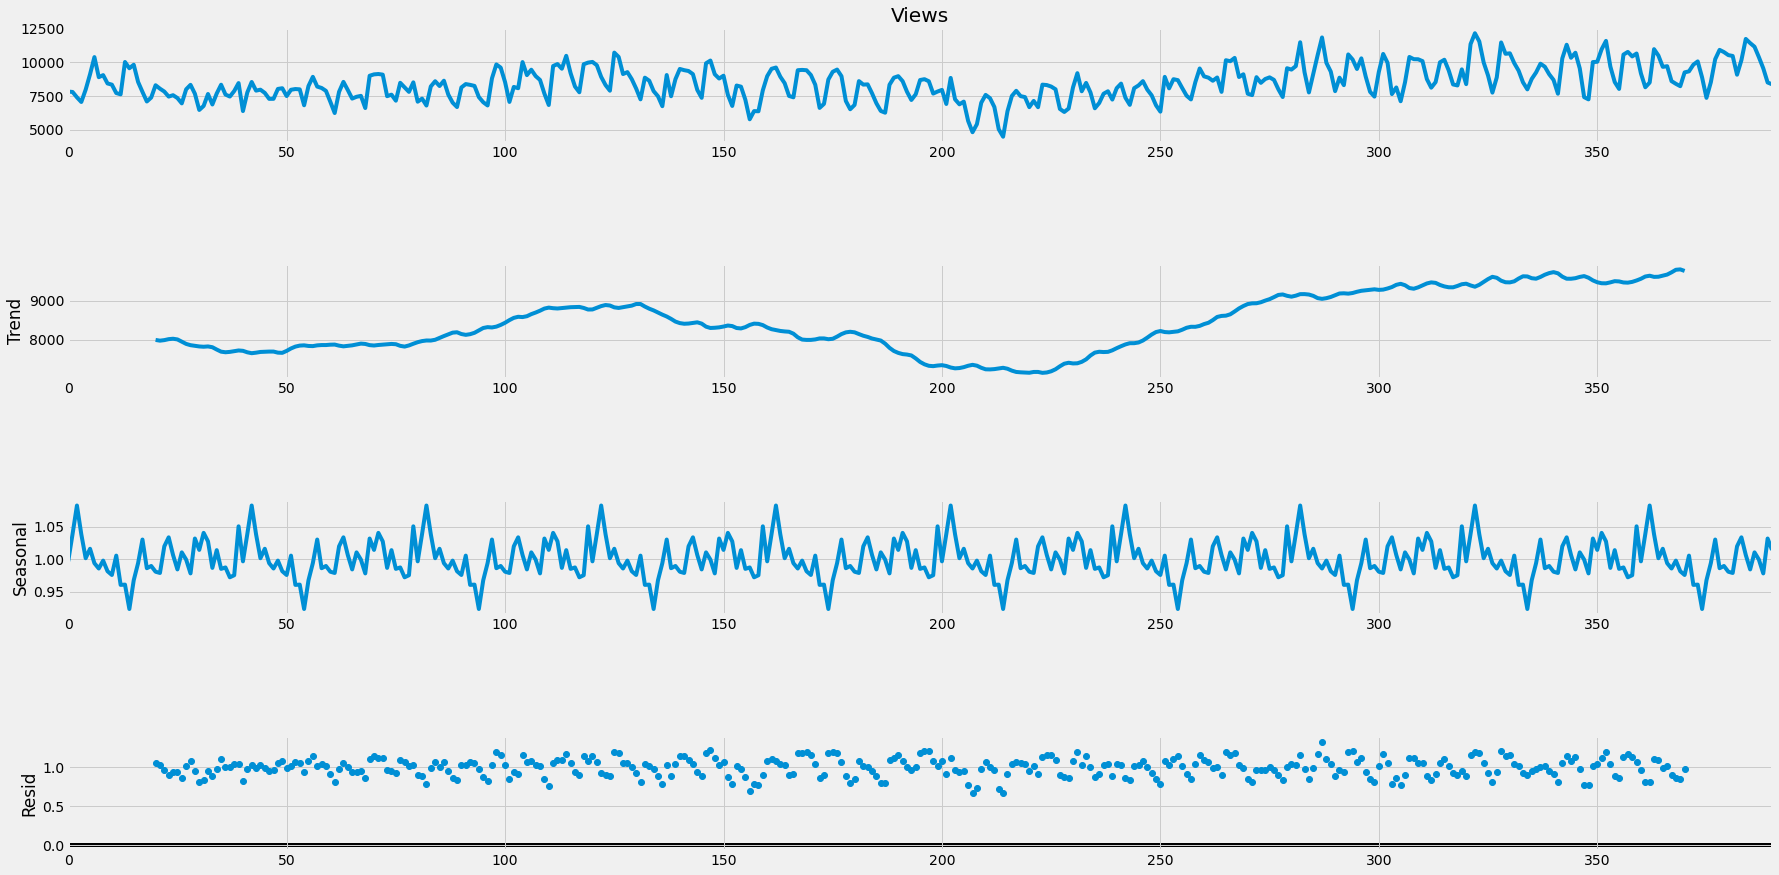

In [11]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 40)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(30, 15)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

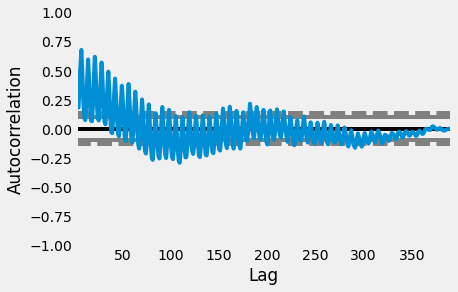

In [28]:
#Sử dụng mô hình ARIMA theo mùa (SARIMA) để dự báo lưu lượng truy cập trên trang web. 
#Trước khi sử dụng mô hình SARIMA, cần tìm các giá trị p, d và q.
#Vì dữ liệu không cố định nên giá trị của d là 1. 
#Để tìm giá trị của p và q, ta sử dụng biểu đồ tự tương quan và tự tương quan một phần:

pd.plotting.autocorrelation_plot(data["Views"])

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


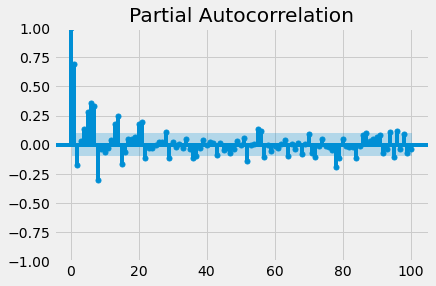

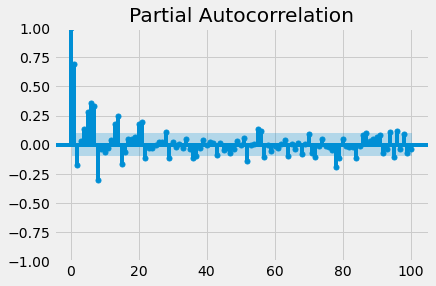

In [17]:
plot_pacf(data["Views"], lags = 10)

In [20]:
# Đào tạo mô hình SARIMA cho nhiệm vụ dự báo lưu lượng truy cập trang web:
# p là chuỗi tự hồi qui AR (auto regression)
# q là chuỗi trung bình trượt MA (moving average)

p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.354
Date:                            Fri, 13 Jan 2023   AIC                           6228.707
Time:                                    15:05:46   BIC                           6287.731
Sample:                                         0   HQIC                          6252.133
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7955      0.133      5.971      0.000       0.534       1.057
ar.L2         -0.7816      0.136   

In [22]:
#Dự báo lưu lượng truy cập trên trang web trong 50 ngày tới.
predictions = model.predict(len(data), len(data) + 50)
print(predictions)

391     9862.560866
392    10764.483641
393    10721.995890
394     9837.168835
395     8752.502809
396     8196.620187
397     8903.975064
398     9679.184815
399    10268.496275
400    10589.224994
401     9783.664314
402     9312.838776
403     9013.807059
404     9055.159019
405    10527.083770
406    10987.584813
407    10837.676321
408    10016.830359
409     9398.883637
410     8593.783610
411     9138.783965
412    10392.964980
413    10590.455491
414    10764.284693
415    10219.721562
416     9402.067711
417     9027.923795
418     9161.237159
419     9904.297014
420    10233.978265
421    10688.960822
422     9853.892705
423     9506.440507
424     9039.923187
425     8781.654393
426    10107.756215
427    10820.430295
428    10871.065000
429    10349.770775
430     9383.537246
431     8622.265320
432     8665.377159
433    10035.814138
434    10482.309070
435    10796.543501
436    10434.471486
437     9270.747219
438     9130.200194
439     9328.257865
440    10284.825672


<AxesSubplot:>

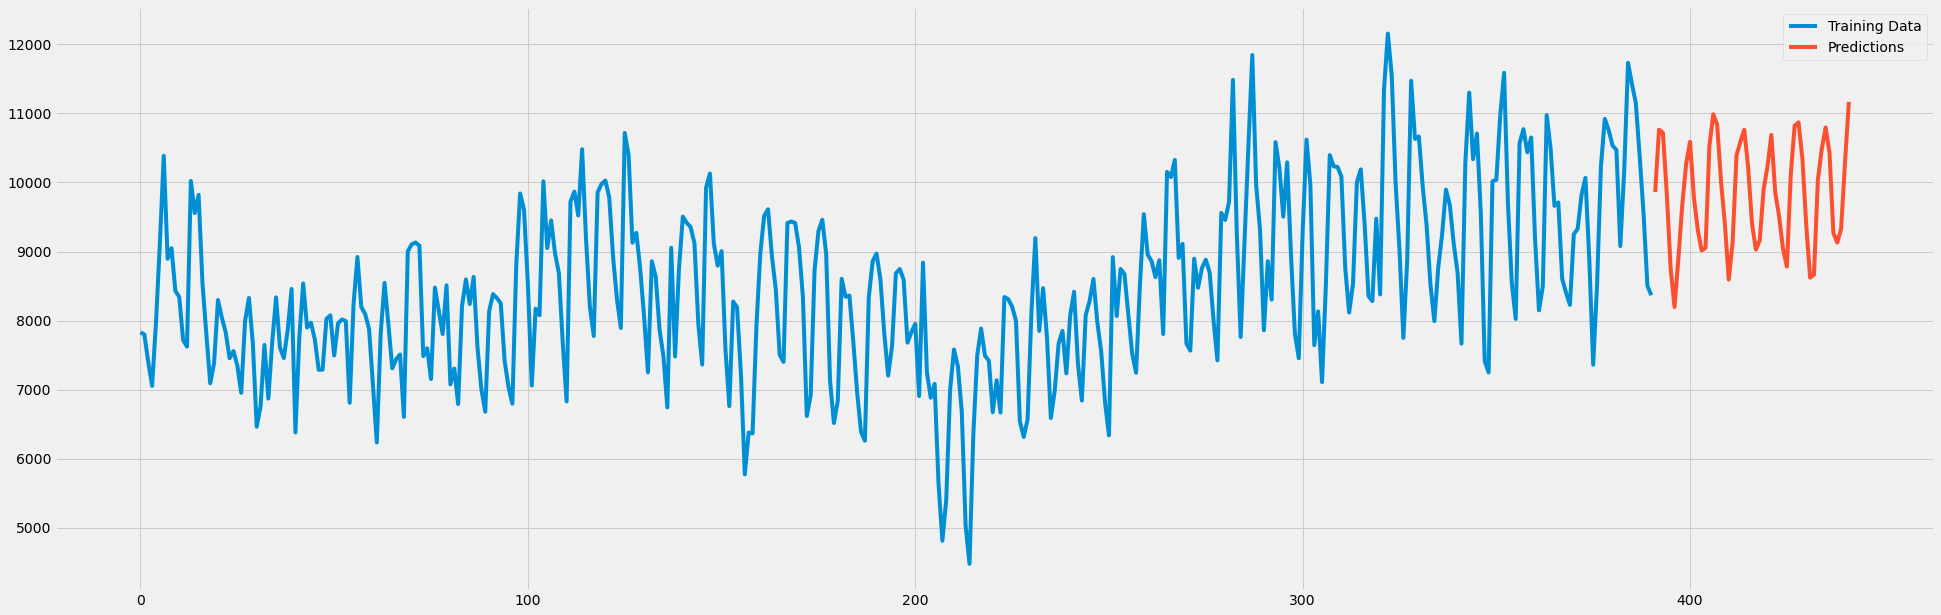

In [27]:
#Dữ liệu được dùng để training
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(30, 10))

#Xuất ra lưu lượng truy cập trên trang web trong 50 ngày tới
predictions.plot(legend=True, label="Predictions")